In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams 
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [381]:
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   
    'axes.unicode_minus': False 
}
rcParams.update(config)  #设置画图的一些参数

In [382]:
# 读取数据
path ='C:/Users/Xy/Desktop/ML ppt/ex2data1.txt'
data = pd.read_csv(path) 
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列
Y_data = data.iloc[:,cols-1:]#X是所有行，最后一列
X_data.insert(0, 'Ones', 1)
X=X_data.values
Y=Y_data.values
feature_dim=X.shape[1]
W=np.zeros((feature_dim,1))
X.shape,Y.shape, W.shape

((99, 3), (99, 1), (3, 1))

In [396]:
#划分训练/测试集
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=20)
x_test[:, 1:]=(x_test[:, 1:] - x_train[:, 1:].mean()) / x_train[:, 1:].std()#先标准化x_test,以防后续x_train后所用的训练均值和方差不是原来的数据了
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((74, 3), (74, 1), (25, 3), (25, 1))

In [397]:
x_train[:, 1:]= ( x_train[:, 1:]- x_train[:, 1:].mean() )/ x_train[:, 1:].std()#对数据进行标准化

In [398]:
#sigmoid函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [399]:
#损失函数
my_lambda=0.01
def computeCost(X,Y,W):
    P=sigmoid(np.dot(W.T,X))
    loss=np.sum(-Y*np.log(P)-(1-Y)*np.log(1-P))/X.shape[1]+(my_lambda/ 2) * np.sum(W ** 2)
    return loss

In [400]:
#梯度下降函数
def gradientDecent(X,Y,W,alpha):
    error=sigmoid(np.dot(W.T,X))-Y
    grad=(np.dot(X,error.T)/X.shape[1])+my_lambda*W
    W-=alpha*grad
    return W

In [401]:
#逻辑回归
def logisticRegression(X,Y,alpha,iters):
    feature_dim=X.shape[0]
    W=np.zeros((feature_dim,1))
    W_=[]
    for i in range(iters):
        W=gradientDecent(X,Y,W,alpha)
        tmp=W.copy()
        W_.append(tmp)
    return W_

In [402]:
alpha=0.01
iters=100000
loss_train=[]
loss_test=[]
W_=logisticRegression(x_train.T,y_train.T,alpha,iters)
for w in W_:
    loss_train.append(computeCost(x_train.T,y_train.T,w))
    loss_test.append(computeCost(x_test.T,y_test.T,w))

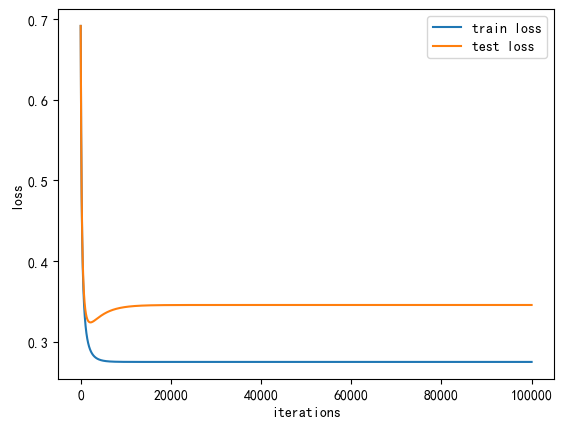

In [403]:
#训练/测试损失图
plt.plot(np.arange(iters), loss_train, label='train loss')
plt.plot(np.arange(iters), loss_test, label='test loss')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [404]:
#预测函数
def predict(W,X):
    probability=sigmoid(np.dot(W.T,X))
    y_hat=probability>=0.5
    return probability,y_hat

In [405]:
P,Y_hat=predict(W_[-1],x_test.T)#用最后一次迭代的w

In [406]:
acc=accuracy_score(y_test,Y_hat.T)
precision=precision_score(y_test,Y_hat.T)
recall=recall_score(y_test,Y_hat.T)
F1score=f1_score(y_test,Y_hat.T)
AUC=roc_auc_score(y_test,P.T)
FPR, TPR, thersholds = roc_curve(y_test, P.T)

In [407]:
#输出模型评估参数
print(f"precission: {precision}\nrecall: {recall}\nF1-score: {F1score}\nAUC: {AUC}")

precission: 0.8823529411764706
recall: 1.0
F1-score: 0.9375
AUC: 0.9600000000000001


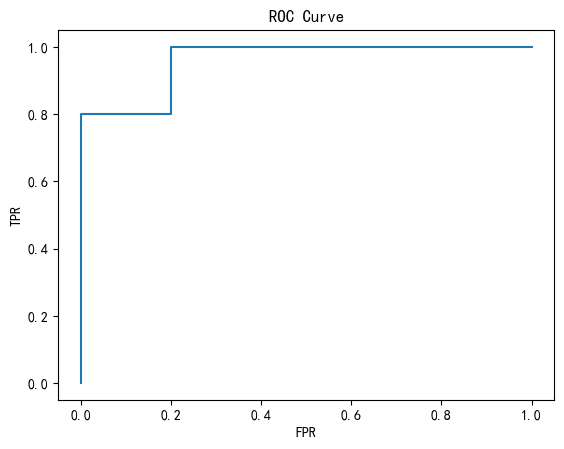

In [408]:
plt.plot(FPR, TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()